<a href="https://colab.research.google.com/github/sirjit2/AIclass/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
data = pd.read_csv("/content/drive/MyDrive/AI/diabetes_.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values


In [6]:
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    split = int(len(X) * test_size)
    test_idx = idx[:split]
    train_idx = idx[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [7]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [8]:
def knn_predict_single(query, X_train, y_train, k):
    distances = [euclidean_distance(query, x) for x in X_train]
    idx = np.argsort(distances)[:k]
    labels = y_train[idx]
    return np.bincount(labels).argmax()


In [9]:
def knn_predict(X_test, X_train, y_train, k):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


In [10]:
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [11]:
pred = knn_predict(X_test, X_train, y_train, k=3)
acc_unscaled = compute_accuracy(y_test, pred)
acc_unscaled


np.float64(67.3913043478261)

Task2

In [12]:
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X)


In [13]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)


In [14]:
pred_scaled = knn_predict(Xs_test, Xs_train, ys_train, k=3)
acc_scaled = compute_accuracy(ys_test, pred_scaled)
acc_scaled


np.float64(70.86956521739131)

Task3

In [15]:
k_values = range(1, 16)

acc_un = []
acc_sc = []
time_un = []
time_sc = []


In [16]:
for k in k_values:
    start = time.time()
    p = knn_predict(X_test, X_train, y_train, k)
    time_un.append(time.time() - start)
    acc_un.append(compute_accuracy(y_test, p))

    start = time.time()
    ps = knn_predict(Xs_test, Xs_train, ys_train, k)
    time_sc.append(time.time() - start)
    acc_sc.append(compute_accuracy(ys_test, ps))


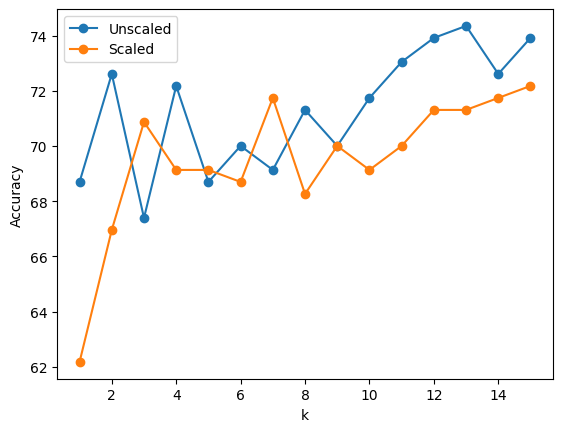

In [17]:
plt.figure()
plt.plot(k_values, acc_un, marker='o')
plt.plot(k_values, acc_sc, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(["Unscaled", "Scaled"])
plt.show()


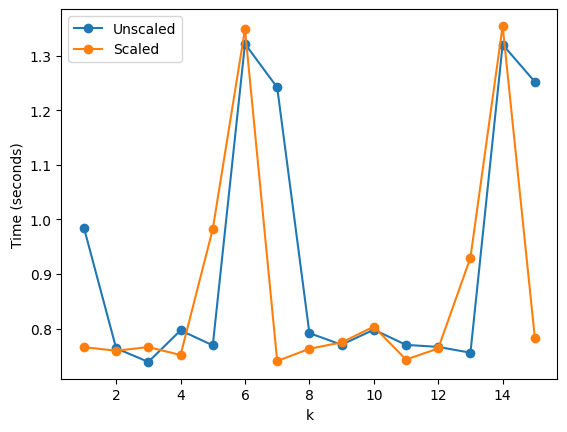

In [18]:
plt.figure()
plt.plot(k_values, time_un, marker='o')
plt.plot(k_values, time_sc, marker='o')
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend(["Unscaled", "Scaled"])
plt.show()
